In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
file_path = '/content/citywise_crime_data_india_extended_with_reviews.csv'  # Make sure to update this path if needed
df = pd.read_csv(file_path)

# Data Preparation
# Encode categorical variables
label_encoders = {}
for column in ['City', 'State', 'Neighbourhood', 'Crime Type']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split dataset into features (X) and target (y)
X = df[['City', 'State', 'Neighbourhood', 'Year', 'Crime Type']]
y = df['Safety Score']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection and Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Suggesting Better Places
# Assuming safety scores above 7 are considered "safe"
safe_places = df[df['Safety Score'] >= 7].sort_values(by='Safety Score', ascending=False)
print("\nTop 5 Safe Places to Consider:")
print(safe_places[['City', 'State', 'Neighbourhood', 'Safety Score']].head(5))


Root Mean Squared Error (RMSE): 2.8767897904945627

Top 5 Safe Places to Consider:
      City  State  Neighbourhood  Safety Score
2439    17      5              5          9.91
6892     5      8              8          9.91
4349    16      0              5          9.91
1211     7      9              9          9.91
1233     7      9              1          9.91


Severity Mappping

In [ ]:
import pandas as pd
from datetime import datetime

# Load the data
crime_data = pd.read_csv('/content/citywise_crime_data_india_extended_with_reviews.csv')

# Preview the data
print(crime_data.head())

# Convert the Date column to datetime, specifying the correct format


# Assign a severity score to each crime type (simple example)
severity_mapping = {
    'Assault': 5,
    'Cyber Crime': 5,
    'Domestic Violence': 3,
    'Drug Trafficking': 3,
    'Kidnapping': 2,
    'Murder': 4,
    'Robbery':1,
    'Theft':1
}
crime_data['SeverityScore'] = crime_data['Crime Type'].map(severity_mapping)

     City        State     Neighbourhood  Year Crime Type  Number of Cases  \
0  Mumbai  Maharashtra          Downtown  2018      Theft             2864   
1  Mumbai  Maharashtra            Uptown  2018      Theft             3189   
2  Mumbai  Maharashtra            Suburb  2018      Theft             2446   
3  Mumbai  Maharashtra   Industrial Area  2018      Theft             4567   
4  Mumbai  Maharashtra  Residential Zone  2018      Theft             1710   

   Severity Score  Safety Score  \
0            3.75          2.68   
1            6.51          6.27   
2            4.68          9.17   
3            3.34          9.78   
4            6.95          8.89   

                                             Review  User Experience Score  
0  Quiet and peaceful locality, ideal for families.                   4.85  
1      High crime rate area, especially after dark.                   3.59  
2  Quiet and peaceful locality, ideal for families.                   4.85  
3         Re

In [ ]:
crime_data["Total SeverityScore"]=crime_data["SeverityScore"]*crime_data["Number of Cases"]
crime_data

,City,State,Neighbourhood,Year,Crime Type,Number of Cases,Severity Score,Safety Score,Review,User Experience Score,SeverityScore,Total SeverityScore
0,Mumbai,Maharashtra,Downtown,2018,Theft,2864,3.75,2.68,"Quiet and peaceful locality, ideal for families.",4.85,1,2864
1,Mumbai,Maharashtra,Uptown,2018,Theft,3189,6.51,6.27,"High crime rate area, especially after dark.",3.59,1,3189
2,Mumbai,Maharashtra,Suburb,2018,Theft,2446,4.68,9.17,"Quiet and peaceful locality, ideal for families.",4.85,1,2446
3,Mumbai,Maharashtra,Industrial Area,2018,Theft,4567,3.34,9.78,Recently saw an increase in cyber crimes.,4.17,1,4567
4,Mumbai,Maharashtra,Residential Zone,2018,Theft,1710,6.95,8.89,"Quiet and peaceful locality, ideal for families.",4.35,1,1710
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,Agra,Uttar Pradesh,Market Area,2022,Drug Trafficking,3825,6.91,2.04,Known for theft and pickpocketing in crowded a...,2.68,3,11475
7996,Agra,Uttar Pradesh,Near Railway Station,2022,Drug Trafficking,4021,5.43,6.34,Safe and friendly neighborhood with regular po...,3.48,3,12063
7997,Agra,Uttar Pradesh,Near Airport,2022,Drug Trafficking,3927,4.63,6.30,Good area with a mix of commercial and residen...,4.81,3,11781
7998,Agra,Uttar Pradesh,Old Town,2022,Drug Trafficking,3472,8.91,3.38,Good area with a mix of commercial and residen...,3.59,3,10416


Safety Score

In [ ]:
# Assuming 'crime_data' is your DataFrame with all data
# Calculate the total severity score for each neighborhood grouped by city and state
neighborhood_safety = crime_data.groupby(['City', 'State', 'Neighbourhood'])['Total SeverityScore'].sum().reset_index()

# Normalize the safety score (lower is safer)
neighborhood_safety['SafetyScore'] = 1 / (1 + neighborhood_safety['Total SeverityScore'])

# Sort neighborhoods by safety score
neighborhood_safety = neighborhood_safety.sort_values(by='SafetyScore', ascending=False)

# Display the result
neighborhood_safety.head()

,City,State,Neighbourhood,Total SeverityScore,SafetyScore
44,Chennai,Tamil Nadu,Near Railway Station,204346,0.000005
125,Lucknow,Uttar Pradesh,New Development,241032,0.000004
192,Vadodara,Gujarat,Market Area,243217,0.000004
26,Bengaluru,Karnataka,Old Town,244404,0.000004
66,Delhi,Delhi,Old Town,245860,0.000004


Encoding Decoding

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
file_path = 'citywise_crime_data_india_extended_with_reviews.csv'  # Update this path as needed
df = pd.read_csv(file_path)

# Reinitialize Label Encoders (to match encoding during training)
label_encoders = {}
for column in ['City', 'State', 'Neighbourhood', 'Crime Type']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Decode the 'City' column to its original values
df['City_Decoded'] = label_encoders['City'].inverse_transform(df['City'])

# Decode other columns if needed
df['State_Decoded'] = label_encoders['State'].inverse_transform(df['State'])
df['Neighbourhood_Decoded'] = label_encoders['Neighbourhood'].inverse_transform(df['Neighbourhood'])
df['Crime_Type_Decoded'] = label_encoders['Crime Type'].inverse_transform(df['Crime Type'])

# Display the decoded values for verification
print(df[['City', 'City_Decoded', 'State', 'State_Decoded']].head())  # Show a few rows to verify decoding

   City City_Decoded  State State_Decoded
0    14       Mumbai      5   Maharashtra
1    14       Mumbai      5   Maharashtra
2    14       Mumbai      5   Maharashtra
3    14       Mumbai      5   Maharashtra
4    14       Mumbai      5   Maharashtra


In [ ]:
crime_number = crime_data.groupby(['Crime Type'])['Number of Cases'].sum().reset_index()

Graphs

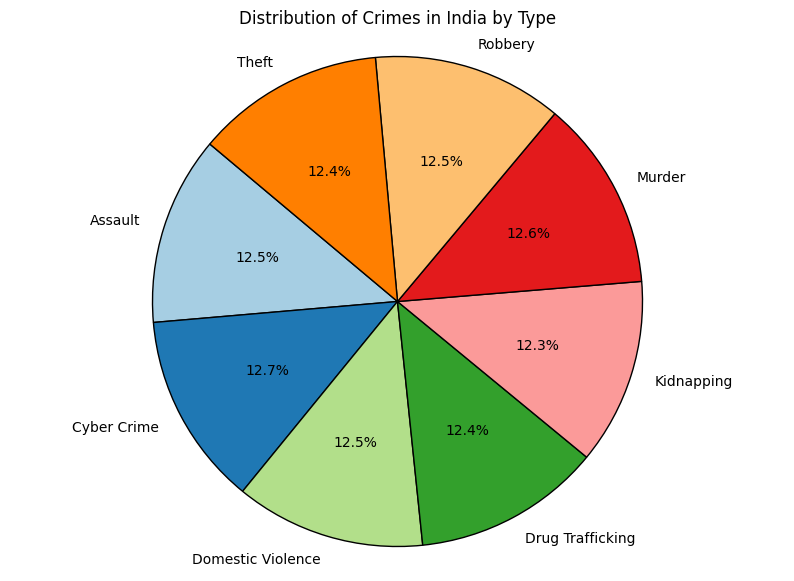

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'crime_data' is your DataFrame that contains crime information
# Group the data by 'Crime Type' and calculate the total number of cases for each type
crime_distribution = crime_data.groupby('Crime Type')['Number of Cases'].sum().reset_index()

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(
    crime_distribution['Number of Cases'],
    labels=crime_distribution['Crime Type'],
    autopct='%1.1f%%',  # Show percentages with one decimal place
    startangle=140,  # Start angle for the pie chart
    colors=plt.cm.Paired(range(len(crime_distribution))),  # Color map for better distinction
    wedgeprops={'edgecolor': 'black'}  # Add border to slices
)

plt.title('Distribution of Crimes in India by Type')
plt.axis('equal')  # Equal aspect ratio to ensure the pie is a circle
plt.show()

<ipython-input-23-032b4f635f3a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


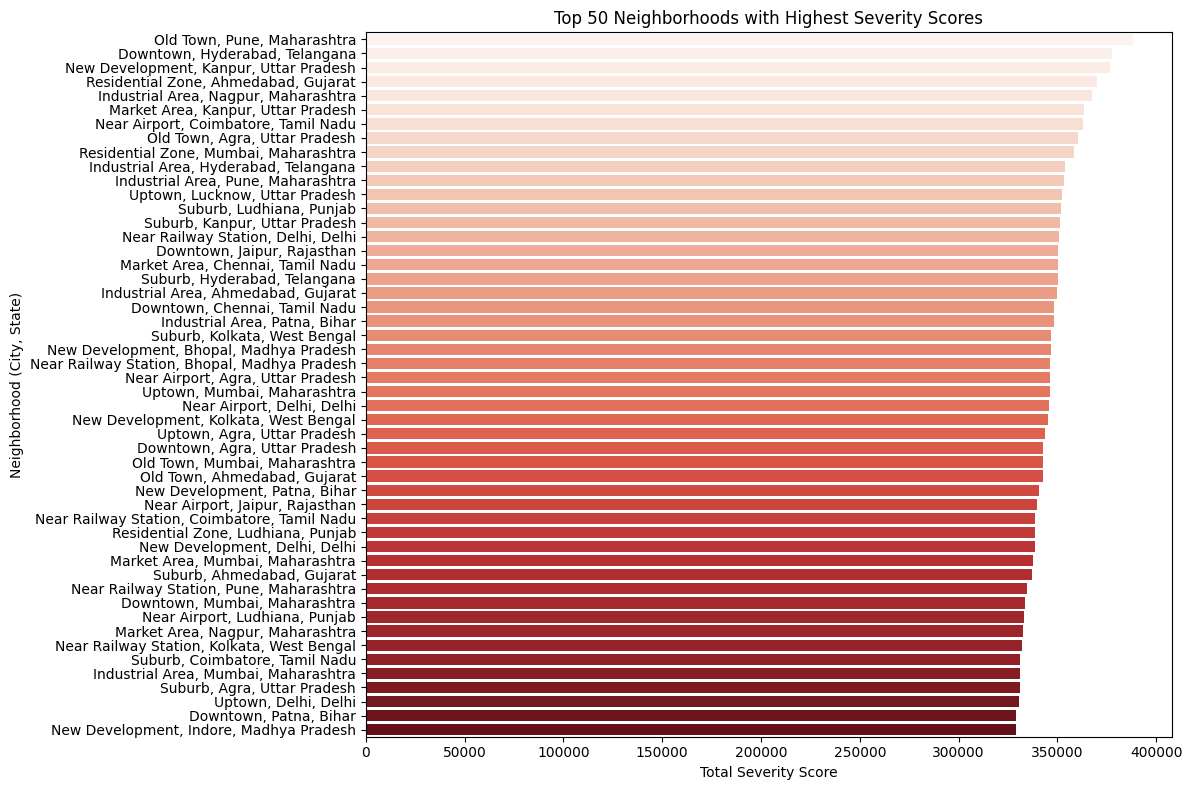

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'neighborhood_safety' is your DataFrame with City, State, Neighbourhood, and Severity Score
# Sort the data by the severity score in descending order and select the top 50 neighborhoods
top_50_neighborhoods = neighborhood_safety.sort_values(by='Total SeverityScore', ascending=False).head(50)

# Create a new column for display purposes that combines city, state, and neighborhood
top_50_neighborhoods['Location'] = top_50_neighborhoods['Neighbourhood'] + ', ' + top_50_neighborhoods['City'] + ', ' + top_50_neighborhoods['State']

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_50_neighborhoods,
    x='Total SeverityScore',
    y='Location',
    palette='Reds'
)
plt.title('Top 50 Neighborhoods with Highest Severity Scores')
plt.xlabel('Total Severity Score')
plt.ylabel('Neighborhood (City, State)')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

In [ ]:
import tweepy
import pandas as pd

# Twitter API credentials
consumer_key = 'LnokMLlJVM5FvHIeQHsNQvc8m'
consumer_secret = '23EGKUlu8NPYHVmmdfNS6QdPPQ3T98W2mHFKMoxrpuxF07A4yp'
access_token = '1517886763364061185-30WOqEuGLP9fmM241yBbuSEp6AFhED'
access_token_secret = 'NjwdNLjLgvByVWTby1ckb4zGV09JucHBRWPMxkZJtj5cX'

# Authenticate with the API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Search tweets about city safety
city_name = 'Downtown'
query = f"{city_name} safe OR safety -filter:retweets"
tweets = tweepy.Cursor(api.search_tweets, q=query, lang="en", tweet_mode='extended').items(100)

# Create DataFrame to store the tweets
tweet_data = [[tweet.full_text, tweet.user.screen_name, tweet.created_at] for tweet in tweets]
df = pd.DataFrame(tweet_data, columns=['Tweet', 'User', 'Date'])

# Save the data to a CSV file
df.to_csv(f'{city_name}_safety_tweets.csv', index=False)

Forbidden: 403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product

In [ ]:
import tweepy
import pandas as pd

# Twitter API v2 credentials (use the same as before for API key and secret)
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAF0IvgEAAAAAM0nVnonfewrhczlQrwu8HxL27NQ%3DFxQiStEse4GOjP0YsCND33PZxTbeCiKfXOF4Y73cVFUvIq8nA3'  # You need a bearer token for v2 API access.

# Initialize the client with the bearer token
client = tweepy.Client(bearer_token=bearer_token)

# Search tweets about city safety
city_name = 'Downtown'
query = f"{city_name} safe OR safety -is:retweet"

# Search recent tweets using the v2 endpoint
tweets = client.search_recent_tweets(query=query, max_results=100, tweet_fields=['created_at', 'text', 'author_id'], lang='en')

# Extract tweet data and create a DataFrame
tweet_data = [[tweet.text, tweet.author_id, tweet.created_at] for tweet in tweets.data]
df = pd.DataFrame(tweet_data, columns=['Tweet', 'User', 'Date'])

# Save the data to a CSV file
df.to_csv(f'{city_name}_safety_tweets_v2.csv', index=False)

print(f'Saved {len(df)} tweets about {city_name} safety.')

Forbidden: 403 Forbidden
When authenticating requests to the Twitter API v2 endpoints, you must use keys and tokens from a Twitter developer App that is attached to a Project. You can create a project via the developer portal.

In [ ]:
from textblob import TextBlob

def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis on each tweet
df['Sentiment'] = df['Tweet'].apply(get_sentiment)

# Save the results with sentiment analysis
df.to_csv(f'{city_name}_safety_tweets_sentiment.csv', index=False)

In [ ]:
sentiment_summary = df['Sentiment'].value_counts()
print(sentiment_summary)